---
title: Orbits
---

References:

- [Going to Jupiter with Python using Jupyter and poliastro — poliastro documentation](https://docs.poliastro.space/en/stable/examples/Going%20to%20Jupiter%20with%20Python%20using%20Jupyter%20and%20poliastro.html)

In [1]:
from astropy.time import Time

from poliastro.bodies import Mercury, Venus, Earth, Mars, Jupiter
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.util import time_range
from poliastro.plotting import StaticOrbitPlotter

import matplotlib.pyplot as plt
plt.rc('savefig', dpi=300)

In [10]:
periods = 75
background_color = 'white'
# background_color = 'dark'

dir = '../figures/orbits'

name00 = f'juno_orbit_{background_color}'
path01 = f'juno_psp_orbit_{background_color}'
path02 = f'psp_orbit_{background_color}'

alpha = 0.77

In [13]:
#| export
def savefig(
    name = None, # name of the file
    dir = dir, # directory to save the file
    path = None, # path to the file
    formats = ['png','pdf'],  
    **kwargs
):
    if path is None:
        path = f"{dir}/{name}"
    
    for fmt in formats:
        fname = f"{path}.{fmt}"
        plt.savefig(fname, bbox_inches="tight", **kwargs)

In [4]:
if background_color == 'dark':
    dark = True
    jno_color = 'white'
else:
    dark = False
    jno_color = None

## Juno

In [5]:
## Main dates
juno_date_launch = Time("2011-08-06", scale="utc").tdb
date_flyby = Time("2012-09-03 19:21", scale="utc").tdb
juno_date_arrival = Time("2016-07-05 03:18", scale="utc").tdb

In [6]:
juno_traj = Ephem.from_horizons(
    "Juno (spacecraft)",
    epochs=time_range(juno_date_launch, end=juno_date_arrival, periods=periods),
    plane=Planes.EARTH_ECLIPTIC,
)

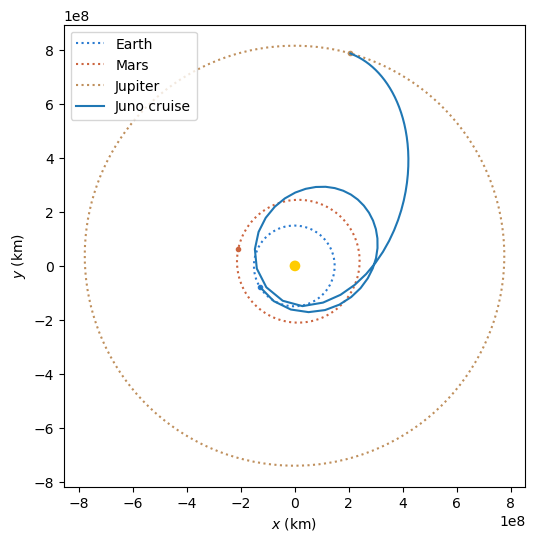

In [14]:

plotter = StaticOrbitPlotter(num_points=300, plane=Planes.EARTH_ECLIPTIC, dark=dark)

plotter.set_body_frame(Earth, juno_date_launch)
earth_plots_traj, earth_plots_pos = plotter.plot_body_orbit(Earth, juno_date_launch)
mars_plots_traj, mars_plots_pos = plotter.plot_body_orbit(Mars, juno_date_arrival)
jupiter_plots_traj, jupiter_plots_pos = plotter.plot_body_orbit(Jupiter, juno_date_arrival)


for body_traj in [earth_plots_traj[0], mars_plots_traj[0], jupiter_plots_traj[0]]:
    body_traj.set_linestyle('dotted')
for body_pos in [earth_plots_pos, mars_plots_pos, jupiter_plots_pos]:
    body_pos.set_markersize(3)
    body_pos.set_label(None)

plotter._set_legend('Earth', earth_plots_traj)
plotter._set_legend('Mars', mars_plots_traj)
plotter._set_legend('Jupiter', jupiter_plots_traj)

juno_plots_traj, juno_plots_pos = plotter.plot_trajectory(juno_traj._coordinates, label="Juno cruise")

plotter._ax.legend(title=None, loc="upper left",)
savefig(name=name00)
# plt.savefig(path00, bbox_inches='tight')

## Juno with Parker Solar Probe

In [ ]:
## Main dates
# August 12, 2018: Launch - 3:31 a.m. EDT (7:31 UTC)
psp_date_launch = Time("2018-08-12T10:00", scale="utc").tdb
# November 5, 2018: Perihelion #1 - 10:27 p.m. EST (Nov. 6, 2018 at 03:27 UTC)
p1_date = Time("2018-11-06T03:27", scale="utc").tdb
# January 19, 2019: Aphelion #1
a1_date = Time("2019-01-19T00:00", scale="utc").tdb

In [ ]:
psp_traj = Ephem.from_horizons(
    "Parker Solar Probe (spacecraft)",
    epochs=time_range(psp_date_launch, end=p1_date, periods=periods),
    plane=Planes.EARTH_ECLIPTIC,
)

psp_traj_2 = Ephem.from_horizons(
    "Parker Solar Probe (spacecraft)",
    epochs=time_range(p1_date, end=a1_date, periods=periods),
    plane=Planes.EARTH_ECLIPTIC,
)

In [ ]:
plotter = StaticOrbitPlotter(num_points=300, plane=Planes.EARTH_ECLIPTIC, dark=dark)

plotter.set_body_frame(Earth, juno_date_launch)
mercury_plots_traj, mercury_plots_pos = plotter._plot_body_orbit(Mercury, psp_date_launch)
venus_plots_traj, venus_plots_pos = plotter.plot_body_orbit(Venus, psp_date_launch)
earth_plots_traj, earth_plots_pos = plotter.plot_body_orbit(Earth, juno_date_launch)
mars_plots_traj, mars_plots_pos = plotter.plot_body_orbit(Mars, juno_date_arrival)
jupiter_plots_traj, jupiter_plots_pos = plotter.plot_body_orbit(Jupiter, juno_date_arrival)


for body_traj in [mercury_plots_traj[0], venus_plots_traj[0], earth_plots_traj[0], mars_plots_traj[0], jupiter_plots_traj[0]]:
    body_traj.set_linestyle('dotted')
for body_pos in [mercury_plots_pos, venus_plots_pos, earth_plots_pos, mars_plots_pos, jupiter_plots_pos]:
    body_pos.set_markersize(3)
    body_pos.set_label(None)

plotter._set_legend('Mercury', mercury_plots_traj)
plotter._set_legend('Venus', venus_plots_traj)
plotter._set_legend('Earth', earth_plots_traj)
plotter._set_legend('Mars', mars_plots_traj)
plotter._set_legend('Jupiter', jupiter_plots_traj)

juno_plots_traj, juno_plots_pos = plotter.plot_trajectory(juno_traj._coordinates, label="Juno cruise", color=jno_color)
psp_plots_traj, psp_plots_pos = plotter.plot_trajectory(psp_traj._coordinates, label="PSP cruise", color="red")
psp_plots_traj_2, psp_plots_pos_2 = plotter.plot_trajectory(psp_traj_2._coordinates, color="red")

juno_plots_traj[0].set_linewidth(1.5)
psp_plots_traj[0].set_linewidth(1.5)
psp_plots_traj_2[0].set_linewidth(1.5)


plotter._ax.legend(title=None, ncols=2, loc="upper left",)
plt.savefig(path01, bbox_inches='tight')

## Parker Solar Probe

In [ ]:
plotter = StaticOrbitPlotter(plane=Planes.EARTH_ECLIPTIC, dark=dark)

mercury_plots_traj, mercury_plots_pos = plotter.plot_body_orbit(Mercury, psp_date_launch)
venus_plots_traj, venus_plots_pos = plotter.plot_body_orbit(Venus, psp_date_launch)
earth_plots_traj, earth_plots_pos = plotter.plot_body_orbit(Earth, psp_date_launch)

psp_plots_traj, psp_plots_pos = plotter.plot_trajectory(psp_traj._coordinates, label="PSP cruise", color="red")
psp_plots_traj_2, psp_plots_pos_2 = plotter.plot_trajectory(psp_traj_2._coordinates, label="PSP cruise", color="red")

psp_plots_traj[0].set_linewidth(2)
psp_plots_traj_2[0].set_linewidth(2)

for body_traj in [mercury_plots_traj[0], venus_plots_traj[0], earth_plots_traj[0]]:
    body_traj.set_linestyle('dotted')
for body_pos in [mercury_plots_pos, venus_plots_pos, earth_plots_pos]:
    body_pos.set_markersize(3)
    
plt.legend().set_visible(False)
plt.savefig(path02, bbox_inches='tight')